In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
def softmax(x) :
    c = np.max(x, axis=1).reshape(-1,1)
    x = x-c
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [25]:
x = np.random.randn(100000,10000)

In [26]:
l1 = np.random.randn(10000,1024)

In [27]:
a1 = sigmoid

In [28]:
l2 = np.random.randn(1024,10)

In [29]:
a2 = softmax

In [30]:
b1 = np.zeros(10000)
b2 = np.zeros(1024)

In [31]:
%%time
predict = a2(np.dot(a1(np.dot(x,l1)),l2))

CPU times: total: 1min 27s
Wall time: 24.2 s


In [36]:
((10000*1024 + 1024*10)*67) /(60*60*24) /365

21.777209538305428

In [77]:
data = np.linspace(-10,10,100)

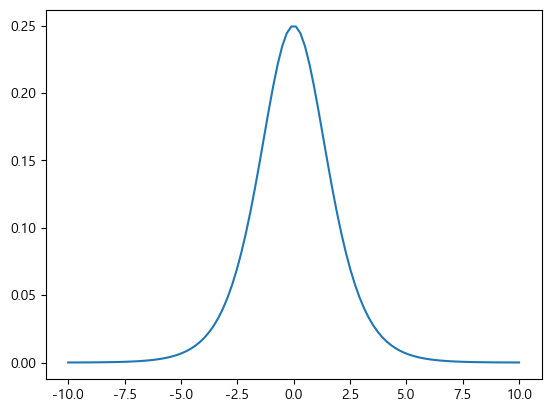

In [78]:
# sigmoid 미분값
# 0.25이상 올라가지 않는다
# 딥러닝에는 어울리지 않음 그러나 rnn에서는 좋음
plt.plot(data, sigmoid(data) * (1-sigmoid(data)))
plt.show()

In [235]:
class AddNode:
    def __init__(self):
        pass
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = self.x+ self.y
        return out
    def backward(self,dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy
    
    
class MulNode:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self,x,y):
        self.x = x
        self.y = y
        out = self.x * self.y
        return out
    
    def backward(self, dout):
        dx = self.y * dout
        dy = self.x * dout
        return dx, dy

In [243]:
apple = 100
apple_num = 2
banana = 300
banana_num = 5
tax = 1.1

In [244]:
mul_apple_layer = MulNode()
mul_apple_layer_tax = MulNode()

In [245]:
apple_price = mul_apple_layer.forward(apple,apple_num)

In [246]:
apple_total_price = mul_apple_layer_tax.forward(apple_price,tax)

In [247]:
apple_total_price

220.00000000000003

In [248]:
dout = 1
dapple, dapple_tax =mul_apple_layer_tax.backward(dout)

In [249]:
print(dapple)
print(dapple_tax)

1.1
200


In [250]:
mul_banana_layer = MulNode()
mul_banana_layer_tax =MulNode()

In [251]:
banana_price = mul_banana_layer.forward(banana, banana_num)

In [252]:
banana_total_price = mul_banana_layer_tax.forward(banana_price, tax)

In [253]:
dbanana, dtbanana_tax = mul_banana_layer_tax.backward(dout)

In [254]:
banana_total_price

1650.0000000000002

In [255]:
total_layer = AddNode()

In [256]:
total_layer.forward(apple_total_price, banana_total_price)

1870.0000000000002

In [257]:
mul_apple_layer = MulNode()
mul_banana_layer = MulNode()
add_apple_banana_layer = AddNode()
mul_tax_layer = MulNode()

In [260]:
apple_price = mul_apple_layer.forward(apple, apple_num)
banana_price = mul_banana_layer.forward(banana, banana_num)

In [261]:
all_price = add_apple_banana_layer.forward(apple_price, banana_price)

In [263]:
total_price = mul_tax_layer.forward(all_price, tax)

In [264]:
total_price

1870.0000000000002

In [271]:
print(f'apple_price = {apple_price}')
print(f'banana_price = {banana_price}')
print(f'all_price = {all_price}')
print(f'total_price = {total_price}')


apple_price = 200
banana_price = 1500
all_price = 1700
total_price = 1870.0000000000002


In [274]:
dout = 1
dtotal_price, dtax = mul_tax_layer.backward(dout)

In [275]:
dtotal_price

1.1